## 지하철 요금별 데이터 시각화하기

In [23]:
import csv
f = open('subwayfee.csv')
data = csv.reader(f)

for row in data :
    print(row)

In [24]:
import csv
f = open('subwayfee.csv')
data = csv.reader(f)

next(data)
for row in data :
    for num in range(4,8) :
        row[num] = int(row[num])
    print(row)

In [25]:
import csv
f = open('subwayfee.csv')
data = csv.reader(f)

rate=0
mx = 0 # 최대값 변수

next(data)
for row in data :
    for num in range(4,8) :
        row[num] = int(row[num])
    if row[6] !=0 :
        rate = row[4] / row[6] # 유임승차/무임승차
        if rate>mx:
            mx =rate
            print(row,round(rate,2))


In [4]:
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

rate=0
mx = 0 # 최대값 변수
mx_station =''

for row in data :
    for num in range(4,8) :
        row[num] = int(row[num])
    if row[6] !=0 and (row[4] + row[6]) > 100000 :
        rate = row[4] / (row[4] + row[6]) # 유임승차/무임승차
        if rate>mx:
            mx =rate
            mx_station = row[3] + ' ' + row[1]
#             print(row,round(rate,2))

print(mx_station, round(mx*100,2))


홍대입구 2호선 95.34


## 유무임 승하차 인원이 가장 많은 역은 어디일까
※ 알고리즘 설꼐하기
1. 데이터를 읽어온다
2. 모드 역의 데이터를 바탕으로 유임승차,유임하차,무임승차,무임하차 인원이 가장 많은 역을 찾는다

In [5]:
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

mx = [0]*4 # 항목이 4개인 리스트로 초기화
mx_station =['']*4

label = ['유임승차', '유임하차', '무임승차', '무임하차']

for row in data :
    for num in range(4,8) :
        row[num] = int(row[num])
        if row[num] > mx[num-4]:
            mx[num-4] = row[num]
            mx_station[num-4] = row[3] + ' ' + row[1]
            
for num in range(4) :
    print(label[num]+' : ' +mx_station[num], mx[num])
   


유임승차 : 강남 2호선 3153418
유임하차 : 강남 2호선 3210437
무임승차 : 종로3가 1호선 387062
무임하차 : 제기동 1호선 400607


In [ ]:
# 그래프로 나타내기(파이차트)
import csv
import matplotlib.pyplot as plt

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

label = ['유임승차', '유임하차', '무임승차', '무임하차']
plt.rc('font', family = 'Malgun Gothic')

for row in data :
    for num in range(4,8) :
        row[num] = int(row[num])
    plt.title(row[3] + ' ' + row[1])
    plt.pie(row[4:8], labels = label, autopct = '%.1f%%')
#     plt.savefig(row[3] + row[1] + '.png') #그림으로 저장
    plt.show()
f.close()            


## 지하철 시간대별 데이터 시각화하기

In [26]:
import csv
f= open('subwaytime.csv')
data = csv.reader(f)
for row in data :
    print(row)

In [27]:
import csv
f= open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

result = []

for row in data :
    row[4:] = map(int, row[4:]) # map : 일괄적으로 변경해줌 , row 4부터 끝까지 int로 변경
    result.append(row[10])

print(len(result))
print(result)

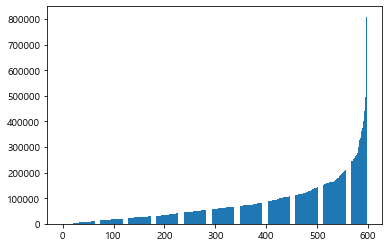

In [33]:
import csv
import matplotlib.pyplot as plt
f= open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

result = []

for row in data :
    row[4:] = map(int, row[4:]) # map : 일괄적으로 변경해줌 , row 4부터 끝까지 int로 변경
    result.append(sum(row[10:15:2])) # 2씩 인덱스 이동(승차합산)
    
result.sort()
plt.bar(range(len(result)), result) # 590역에 승차한 인원들을 bar로 표시 , bar(x,y)
plt.show()

In [9]:
import csv
import matplotlib.pyplot as plt
f= open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

mx = 0
mx_station = ''

for row in data :
    row[4:] = map(int, row[4:]) # map : 일괄적으로 변경해줌 , row 4부터 끝까지 int로 변경
    if sum(row[10:15:2]) > mx :
        mx = sum(row[10:15:2])
        mx_station = row[3] + '(' + row[1] + ')'
print(mx_station,mx)


신림(2호선) 809541


In [12]:
# 출근시간대 하차를 가장 많이 한 역
import csv
f= open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

mx = 0
mx_station = ''

for row in data :
    row[4:] = map(int, row[4:]) # map : 일괄적으로 변경해줌 , row 4부터 끝까지 int로 변경
    if sum(row[11:16:2]) > mx :
        mx = sum(row[11:16:2])
        mx_station = row[3] + '(' + row[1] + ')'
print(mx_station,mx)


강남(2호선) 984427


In [22]:
import csv
f= open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

mx = 0
mx_station = ''

t = int(input('입력한 시간대의 승차 인원이 가장 많은 역?'))

for row in data :
    row[4:] = map(int, row[4:])
    a = row[4+(t-4)*2]
    if a > mx:
        mx = a
        mx_station = row[3] + '(' + row[1] + ')'
print(mx_station, mx)

입력한 시간대의 승차 인원이 가장 많은 역?9
신림(2호선) 211286


In [17]:
# 시간대별로 최대 승차역 
import csv
f= open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

mx = [0] *24 #24개의 빈 리스트 생성
mx_station = [''] *24

for row in data :
    row[4:] = map(int, row[4:])
    for t in range(24):
        a = row[t*2+4]  # 24번째 인덱스까지 반복
        if a > mx[t]:
            mx[t] = a
            mx_station[t] = row[3] + '(' + row[1] + ')'
print(mx_station, mx)
print(mx)

['구로(경부선)', '홍대입구(2호선)', '신림(2호선)', '신림(2호선)', '신림(2호선)', '신림(2호선)', '신림(2호선)', '신림(2호선)', '강남(2호선)', '강남(2호선)', '강남(2호선)', '강남(2호선)', '강남(2호선)', '강남(2호선)', '강남(2호선)', '강남(2호선)', '강남(2호선)', '강남(2호선)', '강남(2호선)', '강남(2호선)', '강남(2호선)', '강남(2호선)', '성신여대입구(돈암)(4호선)', '신방화(9호선)'] [8418, 42966, 80407, 243083, 355172, 211286, 113830, 98765, 126159, 170216, 169097, 203483, 227268, 291623, 431115, 292521, 235489, 295326, 314609, 145504, 27203, 36, 3, 1]
[8418, 42966, 80407, 243083, 355172, 211286, 113830, 98765, 126159, 170216, 169097, 203483, 227268, 291623, 431115, 292521, 235489, 295326, 314609, 145504, 27203, 36, 3, 1]


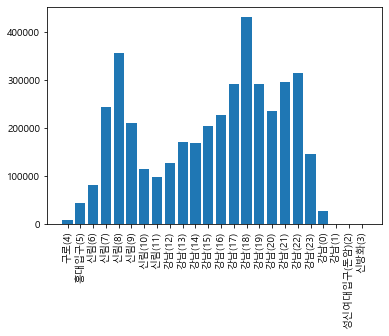

In [19]:
# 시간대별로 최대 승차역 시각화 
import csv
import matplotlib.pyplot as plt
f= open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

mx = [0] *24 #24개의 빈 리스트 생성
mx_station = [''] *24
temp_str = ''

for row in data :
    row[4:] = map(int, row[4:])
    for t in range(24):
        a = row[t*2+4]  # 24번째 인덱스까지 반복
        if a > mx[t]:
            mx[t] = a
            if t+4 >= 24 :
                temp_str= '(' + str(t+4-24) + ')'
            else :
                temp_str= '(' + str(t+4) + ')'
            mx_station[t] = row[3] + temp_str

plt.rc('font', family = 'Malgun Gothic')
plt.bar(range(24), mx)
plt.xticks(range(24), mx_station, rotation=90) # x축에 24개의 구간이 출력 , rotation=90 : 글자를 반시계방향으로 90도 회전
plt.show()


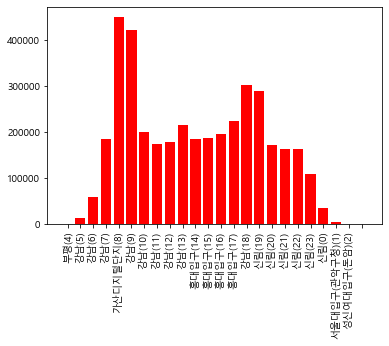

In [27]:
# 시간대별로 최대 하차역 시각화 
import csv
import matplotlib.pyplot as plt
f= open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

mx = [0] *24 #24개의 빈 리스트 생성
mx_station = [''] *24
temp_str = ''

for row in data :
    row[4:] = map(int, row[4:])
    for t in range(24):
        a = row[t*2+5]  # 24번째 인덱스까지 반복
        if a > mx[t]:
            mx[t] = a
            if t+4 >= 24 :
                temp_str= '(' + str(t+4-24) + ')'
            else :
                temp_str= '(' + str(t+4) + ')'
            mx_station[t] = row[3] + temp_str

plt.rc('font', family = 'Malgun Gothic')
plt.bar(range(24), mx, color='red')
plt.xticks(range(24), mx_station, rotation=90) # x축에 24개의 구간이 출력 , rotation=90 : 글자를 반시계방향으로 90도 회전
plt.show()


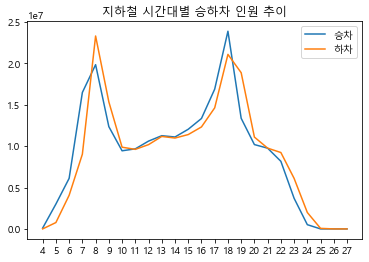

In [18]:
# 시간대별로 최대 하차역 시각화 
import csv
import matplotlib.pyplot as plt
f= open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)

s_in = [0] * 24 # 승차 (24시 이니까 24개로 초기화)
s_out = [0] *24 # 하차

for row in data : 
    row[4:] = map(int, row[4:])
    for i in range(24) :
        s_in[i] += row[4 + i * 2]
        s_out[i] += row[5 + i * 2]
        
plt.rc('font', family = 'Malgun Gothic')
plt.title('지하철 시간대별 승하차 인원 추이')
plt.plot(s_in, label = '승차')
plt.plot(s_out, label = '하차')
plt.legend()
plt.xticks(range(24), range(4,28)) 
plt.show()